In [1]:
# Read Fashion MNIST dataset
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels
X_train, y_train = load_mnist('D:/MachineLearning/data/fashion', kind='train')
X_test, y_test = load_mnist('D:/MachineLearning/data/fashion', kind='t10k')
print(y_train,"",y_train.shape)
print(X_train,"",X_train.shape)
print(X_test,"",X_test.shape)
print(y_test,"",y_test.shape)
X_train = X_train /255
X_test = X_test / 255
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot of Sample Images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    data = X_train[i]
    data = data.reshape(28,28)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data, cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()



[9 0 0 ... 3 0 5]  (60000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]  (60000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]  (10000, 784)
[9 2 1 ... 8 1 5]  (10000,)


<Figure size 1000x1000 with 25 Axes>

In [2]:
#Preprocessing
train_y = []
for i in range(y_train.shape[0]):
    list_y = np.zeros(10)
    #print(y_train[i])
    list_y[y_train[i]] = 1
    #print(list_y)
    train_y.append(list_y)
#print(train_y)
train_y = np.array(train_y)
print(train_y)
train_y = train_y.T
print(train_y)
#print(train_y[:,0:1],"",train_y.shape)
#addones_training = np.ones(X_train.shape[0])
#addones_test = np.ones(X_test.shape[0])
#print(addones.shape)
#addones_training = addones_training.reshape(len(addones_training),1)
#addones_test = addones_test.reshape(len(addones_test),1)
#addonesaddones.reshape()
#X_train = np.append(X_train,addones_training,axis = 1)
#X_test = np.append(X_test,addones_test,axis = 1)
#print(X_train.shape)
#print(X_test.shape)


[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 1. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [3]:
def sigmoid(z,dtype = np.float64):
    sig = 1.0 / (1.0 + np.exp(-z))     # Define sigmoid function
    #print(sig)
    return sig

In [4]:
def softmax(z, dtype = np.float64):
    softmax = np.exp(z)/sum(np.exp(z))
    return softmax

In [5]:
def forward_propagation_test(w1,w2,b1,b2,X,y,m):
    z1_test = np.dot(w1,X.T) + b1
    a1_test = sigmoid(z1_test,dtype = np.float64)
    z2_test = np.dot(w2,a1_test) + b2
    y_hat = softmax(z2_test)
    test = np.argmax(y_hat,axis = 0)
    count_test = np.sum(test == y)
    accuracy = count_test/m
    return (accuracy*100)

In [8]:
def neural_network_training(w1,w2,b1,b2,X,y,y_t,m):
    z1 = np.dot(w1,X.T)+ b1
    #z1 = (z1 - np.min(z1,axis=0))/(np.max(z1,axis=0) - np.min(z1,axis=0))
    a1 = sigmoid(z1, dtype = np.float64)
    z2 = np.dot(w2,a1)+ b2
    y_hat =  softmax(z2, dtype = np.float64)
    #print(t)
    loss = np.sum(-1 *y * np.log(y_hat))
    print("Loss",loss)
    training = np.argmax(y_hat,axis = 0)
    #print(training)
    count = np.sum(training==y_t)
    accuracy = count/m
    print(accuracy*100)
    #calculate_accuracy(t)
    w1,w2,b1,b2 = backpropagation(w1,w2,b1,b2,X,y,a1,y_hat,m)
    return w1,w2,b1,b2,loss,accuracy
    #print("Weight1",w1)
    #print("Weight2",w2)
    

In [9]:
def backpropagation(w1,w2,b1,b2,X,y,a1,y_hat,m):
    dz2 = (y_hat-y)
    dw2 = np.dot(dz2,a1.T)/m
    db2 = np.sum(dz2,axis = 1, keepdims = True)/m
    dz1 = np.dot(w2.T,dz2) * a1 * (1-a1)
    dw1 = np.dot(dz1,X)/m
    db1 = np.sum(dz1,axis = 1, keepdims = True)/m
    w1 = w1 - 0.01 * dw1
    w2 = w2 - 0.01 * dw2
    b2 = b2 - 0.01 * db2
    b1 = b1 - 0.01 * db1
    return w1,w2,b1,b2

In [13]:
'''X = X_train[0:50,:]
print(X.shape)
y = train_y[:,0:50]
print(y.shape)
y2 = y_train[0:50]

'''
loss_training = []
accuracy_training= []
batch_size = 50
w1 = np.random.rand(64,X_train.shape[1]) * 0.01
print(np.mean(w1))
w2 = np.random.rand(10,64) * 0.01
print(np.mean(w2))
b1 = np.zeros((1,batch_size))
b2 = np.zeros((1,batch_size))
epochs = 10
loss_training_epoch = 0
accuracy_training_epoch = 0
epoch_list = []
print(X_train.shape[0]/batch_size)
for i in range(epochs):
    loss_training_epoch = 0
    accuracy_training_epoch = 0
    for j in range(int(X_train.shape[0]/batch_size)):
        random_list = np.random.randint(0,X_train.shape[0],batch_size)
        #print(random_list)
        X = X_train[random_list]
        y = train_y[:,random_list]
        y_t = y_train[random_list]
        w1,w2,b1,b2,loss,accuracy = neural_network_training(w1,w2,b1,b2,X,y,y_t,batch_size)
        loss_training_epoch += loss
        accuracy_training_epoch += accuracy
    loss_training.append(loss_training_epoch/(X_train.shape[0]/batch_size))
    accuracy_training.append(accuracy_training_epoch/(X_train.shape[0]/batch_size))
    epoch_list.append(i)
    
loss_training = np.array(loss_training)
accuracy_training = np.array(accuracy_training)
epoch_list = np.array(epoch_list)
#print(np.mean(w1))
#print(np.mean(w2))
#print(w1)
#print(w2)

0.004988406324018173
0.005032553226467819
1200.0
Loss 115.10059601910558
6.0
Loss 115.14039759482722
16.0
Loss 114.79975587564041
20.0
Loss 115.49831108127556
4.0
Loss 115.45078858928997
4.0
Loss 115.31821942428488
8.0
Loss 115.03216706781417
12.0
Loss 115.43592984304203
8.0
Loss 114.80424897040103
12.0
Loss 115.17837146599659
6.0
Loss 115.48697909048353
10.0
Loss 115.13171873828219
12.0
Loss 115.23206553863889
10.0
Loss 114.89730634630887
14.000000000000002
Loss 114.79708534151091
8.0
Loss 115.53573404958337
6.0
Loss 115.03587794454329
16.0
Loss 114.56381825446529
12.0
Loss 114.63776941992266
4.0
Loss 114.06908390989648
22.0
Loss 115.90955311383408
2.0
Loss 116.15400135062285
6.0
Loss 114.97249098351942
10.0
Loss 114.90180377809486
14.000000000000002
Loss 115.8314258863434
6.0
Loss 115.33156206888361
6.0
Loss 115.36091820405203
8.0
Loss 114.90847007190987
12.0
Loss 114.79342579748392
12.0
Loss 114.55209618981485
10.0
Loss 115.12047384162818
8.0
Loss 114.78678325269456
14.0000000000000

Loss 114.13843615003675
8.0
Loss 114.52420697047825
10.0
Loss 116.32403798834079
4.0
Loss 115.07481946950679
10.0
Loss 114.88204569200786
14.000000000000002
Loss 114.46924700714365
16.0
Loss 115.22635652324192
10.0
Loss 115.22537289446186
12.0
Loss 114.99391972985802
10.0
Loss 115.02777304771159
12.0
Loss 114.61974043130658
14.000000000000002
Loss 114.73396276664042
8.0
Loss 115.58472770683638
10.0
Loss 115.26730075557288
6.0
Loss 115.13989920962177
10.0
Loss 114.33061671672924
10.0
Loss 114.77191069314851
6.0
Loss 115.0141037175427
6.0
Loss 115.47742532204792
16.0
Loss 113.29385082517189
14.000000000000002
Loss 114.4596804118739
12.0
Loss 115.93397045943922
6.0
Loss 114.01212963592673
12.0
Loss 115.62346878620609
12.0
Loss 114.84555028057645
10.0
Loss 114.47491626360448
6.0
Loss 114.69020309743055
16.0
Loss 114.75835008376356
8.0
Loss 116.00269744282673
10.0
Loss 114.37804438360087
14.000000000000002
Loss 114.88319568383065
14.000000000000002
Loss 114.99425665955144
8.0
Loss 115.20192

Loss 115.24662664370162
14.000000000000002
Loss 114.46297386574955
12.0
Loss 114.83199661334311
16.0
Loss 115.10138495019285
8.0
Loss 114.96223456659247
6.0
Loss 115.96385305064541
4.0
Loss 115.2293879706354
2.0
Loss 115.11318752519861
6.0
Loss 114.37266713787866
4.0
Loss 114.85965032206462
14.000000000000002
Loss 114.46274400904342
10.0
Loss 114.8746647321412
10.0
Loss 116.01982693433712
6.0
Loss 114.95660618205875
14.000000000000002
Loss 114.58438628278623
16.0
Loss 115.37350989897512
10.0
Loss 114.56615711405317
6.0
Loss 115.5401041226657
8.0
Loss 114.9520846543762
6.0
Loss 114.68045061282449
6.0
Loss 114.51544609982811
12.0
Loss 114.60057719516006
18.0
Loss 115.13103608721855
14.000000000000002
Loss 114.22106315499148
10.0
Loss 114.52561673563194
10.0
Loss 114.66653044106721
4.0
Loss 116.08644395560934
6.0
Loss 114.78911059678342
14.000000000000002
Loss 113.87812101156865
10.0
Loss 115.12212129972457
10.0
Loss 115.2882263669187
12.0
Loss 114.9588419730415
8.0
Loss 115.7539778576894

Loss 115.4376221887764
8.0
Loss 114.06288302762644
8.0
Loss 114.04485967835842
14.000000000000002
Loss 113.480143545449
8.0
Loss 114.05929984749453
10.0
Loss 114.39704577549995
6.0
Loss 112.9376905606279
20.0
Loss 114.81854503822117
12.0
Loss 114.76009308913369
14.000000000000002
Loss 113.1352673020424
20.0
Loss 114.1202695819158
14.000000000000002
Loss 115.10079713651834
10.0
Loss 114.18421539545838
12.0
Loss 114.80848994941623
12.0
Loss 116.31190681332399
6.0
Loss 114.01359354592776
12.0
Loss 113.17213828350117
18.0
Loss 115.43896083708279
8.0
Loss 113.91339263160549
14.000000000000002
Loss 115.30949416951447
4.0
Loss 116.17039364598551
8.0
Loss 114.37673175367149
6.0
Loss 114.60741694080393
14.000000000000002
Loss 114.34697431992564
10.0
Loss 114.94931052623295
8.0
Loss 115.31555534766562
4.0
Loss 113.46477003090432
14.000000000000002
Loss 114.3243497285508
10.0
Loss 114.32624331584458
10.0
Loss 114.05993670666362
14.000000000000002
Loss 113.701024190978
14.000000000000002
Loss 114.

16.0
Loss 114.35842150927436
24.0
Loss 114.4283852410031
14.000000000000002
Loss 113.52370736386224
18.0
Loss 114.54390252421298
8.0
Loss 114.1254160733349
12.0
Loss 113.47155907895497
10.0
Loss 115.29122303342295
4.0
Loss 113.92796193505082
14.000000000000002
Loss 113.7574016714801
8.0
Loss 113.56282332507128
6.0
Loss 114.34954523245275
10.0
Loss 116.04078774432932
8.0
Loss 115.4972119152778
8.0
Loss 114.31432618324871
8.0
Loss 114.76324068398577
8.0
Loss 114.00702951944031
14.000000000000002
Loss 113.3958493804554
10.0
Loss 114.03017345627426
14.000000000000002
Loss 115.07242807710537
6.0
Loss 114.8956341367294
2.0
Loss 114.61135050552281
8.0
Loss 114.34064407198909
14.000000000000002
Loss 114.68396084532469
10.0
Loss 115.51713124238113
0.0
Loss 114.3388759317683
14.000000000000002
Loss 115.5051199819663
2.0
Loss 114.46861669096941
16.0
Loss 113.78829117939193
12.0
Loss 114.72451267363112
8.0
Loss 114.59161006848369
6.0
Loss 115.20767379624908
8.0
Loss 114.22346851264538
2.0
Loss 114

8.0
Loss 113.84770688200297
6.0
Loss 113.98159020279579
12.0
Loss 113.21365465959967
12.0
Loss 112.9853708063411
14.000000000000002
Loss 113.12383523177436
24.0
Loss 113.8806196404438
18.0
Loss 114.4283381441117
10.0
Loss 113.76935596939512
10.0
Loss 113.9966270618656
14.000000000000002
Loss 112.50630897669964
18.0
Loss 114.09684170394374
6.0
Loss 113.94635223264068
16.0
Loss 112.7753807866585
26.0
Loss 113.91095973176753
22.0
Loss 112.39408536822512
28.000000000000004
Loss 111.58653763228332
12.0
Loss 112.89546455433805
20.0
Loss 114.06021890364308
8.0
Loss 114.18824595934093
14.000000000000002
Loss 114.89087227454927
10.0
Loss 113.30155021443241
16.0
Loss 113.14160811701541
12.0
Loss 113.09945825972565
12.0
Loss 113.58363996796902
14.000000000000002
Loss 114.04978229828056
10.0
Loss 114.23690897006841
6.0
Loss 113.92898754809426
10.0
Loss 113.23556313460247
10.0
Loss 112.9706541094812
18.0
Loss 113.73413424131637
14.000000000000002
Loss 113.01495365419524
14.000000000000002
Loss 113.

Loss 112.18457296957357
10.0
Loss 111.9596955117418
18.0
Loss 111.77365709546339
18.0
Loss 111.6000004424044
26.0
Loss 111.36223110300003
20.0
Loss 112.00272294148095
18.0
Loss 111.14834737585946
28.000000000000004
Loss 111.63040974599244
14.000000000000002
Loss 111.70680926531752
20.0
Loss 111.70420938098388
20.0
Loss 111.46008879673882
28.000000000000004
Loss 112.37029237380796
24.0
Loss 111.4608958074684
18.0
Loss 111.87506776723242
20.0
Loss 112.05552175525813
26.0
Loss 110.93423543392645
34.0
Loss 111.10570190671746
28.000000000000004
Loss 111.36777775584358
20.0
Loss 111.80757590058188
20.0
Loss 111.99659995091268
18.0
Loss 111.67350819648959
22.0
Loss 110.99940896974212
30.0
Loss 111.77514245619912
22.0
Loss 111.2934200085982
24.0
Loss 111.9214665069642
16.0
Loss 111.43264685233112
24.0
Loss 111.1044618271313
20.0
Loss 110.93234469020295
18.0
Loss 111.16391298285602
14.000000000000002
Loss 110.814272392783
16.0
Loss 111.73740505674165
20.0
Loss 111.25432224226847
14.000000000000

Loss 105.97518582160659
46.0
Loss 107.04112515044453
34.0
Loss 105.94088038687735
36.0
Loss 106.72671463446451
28.000000000000004
Loss 105.99865464030248
34.0
Loss 105.93126729876224
36.0
Loss 106.12781665109654
24.0
Loss 107.10532594917356
30.0
Loss 105.74086029789873
36.0
Loss 107.15101302159745
34.0
Loss 105.6591659744901
46.0
Loss 107.41399976307753
28.000000000000004
Loss 106.17237091633868
24.0
Loss 107.01003048884051
36.0
Loss 106.82685087552616
32.0
Loss 106.04632812212716
26.0
Loss 105.12507159668738
32.0
Loss 106.91435839710431
22.0
Loss 105.09244175667303
36.0
Loss 105.30324234057724
26.0
Loss 104.99857866223152
42.0
Loss 106.66414698264855
26.0
Loss 106.36733234161798
36.0
Loss 106.62325475176732
26.0
Loss 105.65151890149357
36.0
Loss 106.5562723434662
16.0
Loss 105.83286842624919
34.0
Loss 107.30157435417146
14.000000000000002
Loss 106.05897209589226
38.0
Loss 105.3554650799413
40.0
Loss 104.7172512913457
36.0
Loss 105.17486985513523
24.0
Loss 104.62145417915939
32.0
Loss 

42.0
Loss 99.7397234926996
36.0
Loss 97.31723715963568
36.0
Loss 100.7254500356083
36.0
Loss 97.23071043620303
54.0
Loss 97.36540170694178
52.0
Loss 96.57930819289149
54.0
Loss 97.70423068071219
42.0
Loss 99.40466779673451
38.0
Loss 96.38034109664639
38.0
Loss 99.5312080647011
42.0
Loss 99.20416932958508
30.0
Loss 96.37454190820128
38.0
Loss 95.97128252162528
34.0
Loss 100.15611845606186
26.0
Loss 98.79175913344477
38.0
Loss 98.31399494357512
32.0
Loss 99.05960015052206
32.0
Loss 100.75166093242997
28.000000000000004
Loss 97.2865127417509
18.0
Loss 99.47325651728022
40.0
Loss 98.84204074142131
46.0
Loss 96.96423451186078
44.0
Loss 98.43877450995015
34.0
Loss 97.3137618138989
42.0
Loss 96.79412008444655
38.0
Loss 95.96801688283475
32.0
Loss 98.16408705767205
30.0
Loss 98.94100136159534
44.0
Loss 101.08295741234363
26.0
Loss 97.62604066289927
30.0
Loss 97.435339443289
38.0
Loss 97.2774613914229
36.0
Loss 96.10200100431584
44.0
Loss 98.54654886007725
30.0
Loss 97.75523665949709
40.0
Loss 

Loss 87.47103229224534
56.00000000000001
Loss 89.88633505465388
46.0
Loss 89.13446331660609
36.0
Loss 90.6148731920436
40.0
Loss 90.41554201129354
40.0
Loss 91.3411420807831
38.0
Loss 92.00208225123076
34.0
Loss 89.7725607889579
32.0
Loss 91.74487560505008
36.0
Loss 87.8979409343959
38.0
Loss 89.11763190719986
34.0
Loss 90.84213030696682
38.0
Loss 90.24890596573937
36.0
Loss 92.90417200326688
20.0
Loss 89.44244348219294
46.0
Loss 90.53891491083148
36.0
Loss 89.26663008789085
36.0
Loss 90.87056925731841
38.0
Loss 89.68253905743367
36.0
Loss 88.45618936317021
30.0
Loss 94.97984684359216
20.0
Loss 88.03119767143127
24.0
Loss 91.9384062698046
38.0
Loss 89.50590712482847
22.0
Loss 89.82116640353394
34.0
Loss 90.64243514918101
30.0
Loss 92.24540233665337
30.0
Loss 89.4633690760447
50.0
Loss 88.78558485873167
44.0
Loss 90.06402494207586
40.0
Loss 88.73170679154694
46.0
Loss 89.78525572069029
32.0
Loss 90.60670332697697
44.0
Loss 89.74648919156573
44.0
Loss 89.23340809916807
44.0
Loss 92.12544

26.0
Loss 83.19806843289155
40.0
Loss 82.10477822335253
40.0
Loss 88.00315851080092
26.0
Loss 82.85495478539656
34.0
Loss 86.01493208867079
40.0
Loss 84.56028174781929
50.0
Loss 86.8898282031959
34.0
Loss 85.149125671706
36.0
Loss 84.61818796990946
30.0
Loss 83.84324367407632
44.0
Loss 86.3785737545634
36.0
Loss 87.67685986898525
46.0
Loss 86.51255967601264
26.0
Loss 83.0298738623716
38.0
Loss 83.7375374499901
34.0
Loss 87.05957939719477
38.0
Loss 85.71025046338703
40.0
Loss 86.50272121788316
32.0
Loss 84.9452632075241
42.0
Loss 84.5278000242432
46.0
Loss 85.33919544417216
40.0
Loss 86.8039735290929
46.0
Loss 82.86818364726983
48.0
Loss 82.88003985153757
40.0
Loss 81.7601464830558
48.0
Loss 82.18339516400113
54.0
Loss 83.87330022315723
48.0
Loss 84.13628860552096
40.0
Loss 83.64583084715261
48.0
Loss 86.88533084466755
32.0
Loss 85.93493572054162
44.0
Loss 83.99466503096428
44.0
Loss 85.8861026058906
36.0
Loss 83.228191000858
34.0
Loss 86.165330705197
40.0
Loss 83.63669142606832
42.0
Lo

Loss 82.70168348573685
42.0
Loss 81.00910793561742
44.0
Loss 82.17981355095132
44.0
Loss 77.6451457806208
40.0
Loss 78.69864773336575
48.0
Loss 77.35228625711014
57.99999999999999
Loss 80.76891503685317
57.99999999999999
Loss 82.0628340229411
48.0
Loss 77.65839500593682
56.00000000000001
Loss 82.58774966836597
40.0
Loss 77.73203827635784
50.0
Loss 78.70977411472956
44.0
Loss 85.01762120417487
38.0
Loss 79.37300370798003
38.0
Loss 80.78893058517505
50.0
Loss 79.4024094801753
46.0
Loss 85.55784679078442
26.0
Loss 81.5925010198167
48.0
Loss 78.26275218183471
54.0
Loss 80.6986720452483
40.0
Loss 77.06179470429264
56.00000000000001
Loss 80.93835542750767
54.0
Loss 75.99393252797522
62.0
Loss 81.39995192280998
48.0
Loss 79.51162937480895
42.0
Loss 82.5350589165221
36.0
Loss 80.80269139612494
42.0
Loss 82.4634294713963
50.0
Loss 78.4606882148257
40.0
Loss 79.57317316447131
46.0
Loss 79.03318587985942
62.0
Loss 81.5887574374404
38.0
Loss 80.2693916502846
52.0
Loss 80.05071416338231
48.0
Loss 8

40.0
Loss 74.6625338119612
42.0
Loss 74.94926687054455
46.0
Loss 75.12989493594381
52.0
Loss 76.43122501101725
54.0
Loss 81.04824182186535
38.0
Loss 75.49162569259667
44.0
Loss 77.84584896891405
44.0
Loss 75.01271482288632
56.00000000000001
Loss 77.42833135690319
52.0
Loss 74.6428489286295
52.0
Loss 80.8800197308243
42.0
Loss 75.41854749887658
52.0
Loss 75.63613185616816
46.0
Loss 78.86220143780596
38.0
Loss 77.86064410648216
42.0
Loss 78.8122153869046
36.0
Loss 78.12803165334213
40.0
Loss 76.619644422786
56.00000000000001
Loss 75.30678180353365
48.0
Loss 80.55442956829089
26.0
Loss 79.48487860117864
34.0
Loss 79.45555671157916
52.0
Loss 74.04154955164773
54.0
Loss 75.98026301640962
50.0
Loss 74.4182210151285
48.0
Loss 76.76749606734336
46.0
Loss 77.15465277364241
48.0
Loss 83.02261662442744
40.0
Loss 74.49605119807819
52.0
Loss 75.31602736495574
40.0
Loss 73.10080481178098
54.0
Loss 77.22113529918727
44.0
Loss 76.87804516118057
52.0
Loss 78.41172016666685
44.0
Loss 76.63063645816513
5

48.0
Loss 73.88886156094075
46.0
Loss 72.38673138764514
44.0
Loss 74.45069622928759
57.99999999999999
Loss 70.82835014819122
66.0
Loss 69.27932799372628
62.0
Loss 80.4589587771767
38.0
Loss 74.26285546565494
44.0
Loss 76.42937265247011
50.0
Loss 69.98300323112719
62.0
Loss 75.26364769203519
57.99999999999999
Loss 74.5529550079156
56.00000000000001
Loss 74.65547492189178
48.0
Loss 72.48266902279647
54.0
Loss 74.96561801725807
52.0
Loss 72.45593283375317
66.0
Loss 70.32560818904379
54.0
Loss 73.99225151262884
50.0
Loss 78.22177803136555
54.0
Loss 76.51881131479036
42.0
Loss 72.4718828761819
56.00000000000001
Loss 73.42859620049603
50.0
Loss 73.68012319882587
54.0
Loss 73.07762356392138
54.0
Loss 70.6148048286293
57.99999999999999
Loss 77.81058440950451
44.0
Loss 73.21372229644284
54.0
Loss 72.39457099594836
50.0
Loss 74.85363843606252
54.0
Loss 69.80659290251238
57.99999999999999
Loss 73.68340260150777
54.0
Loss 72.81306881077482
52.0
Loss 73.45146756167529
48.0
Loss 73.7285142759507
42.

Loss 70.64817061830115
48.0
Loss 74.62782524478042
46.0
Loss 73.6800390553028
56.00000000000001
Loss 76.11308780573168
52.0
Loss 73.7277215276489
52.0
Loss 70.44286217764736
46.0
Loss 72.16540036642903
52.0
Loss 71.55526282046718
54.0
Loss 70.64626807470763
52.0
Loss 69.11555093661951
52.0
Loss 70.37821452432476
52.0
Loss 70.20814238297682
66.0
Loss 68.39075677734957
64.0
Loss 74.8054580877143
50.0
Loss 71.36192524866846
52.0
Loss 69.51204793063823
62.0
Loss 71.63031576007418
62.0
Loss 74.44727363994679
52.0
Loss 67.28082266385051
66.0
Loss 74.92994159614734
50.0
Loss 69.43844590228485
66.0
Loss 69.70842420103075
56.00000000000001
Loss 71.59490902941872
56.00000000000001
Loss 71.28139967932407
57.99999999999999
Loss 69.05757363792625
64.0
Loss 73.57646339987252
46.0
Loss 69.31136359469973
54.0
Loss 70.24382037741594
60.0
Loss 73.24490483012724
56.00000000000001
Loss 70.9501927208345
54.0
Loss 65.10001415546175
70.0
Loss 72.94997297920759
54.0
Loss 68.31072299202783
60.0
Loss 71.1686708

Loss 71.2781138556955
46.0
Loss 69.88724980578596
52.0
Loss 68.02520286939185
52.0
Loss 67.48630016217214
62.0
Loss 64.14258062662512
70.0
Loss 70.9567179881564
57.99999999999999
Loss 70.16454943252846
44.0
Loss 66.91095570250693
57.99999999999999
Loss 71.4537034626491
52.0
Loss 64.38143757069253
64.0
Loss 65.0104653433732
62.0
Loss 72.63477258884708
54.0
Loss 70.45100044936204
54.0
Loss 67.22389948030693
60.0
Loss 64.3305969281525
64.0
Loss 66.64340175994384
54.0
Loss 69.67441350307813
62.0
Loss 72.20405309162214
54.0
Loss 67.4134513314375
56.00000000000001
Loss 67.98425340938164
56.00000000000001
Loss 73.42899749363166
48.0
Loss 66.13167310524643
62.0
Loss 67.64684100379017
62.0
Loss 65.39778032320608
46.0
Loss 66.3499697685708
48.0
Loss 68.61956128707612
56.00000000000001
Loss 68.19606904992604
62.0
Loss 69.21577910054611
54.0
Loss 75.5312500569153
50.0
Loss 70.08469686813211
46.0
Loss 70.06589396762311
56.00000000000001
Loss 70.64896218651627
50.0
Loss 68.29412869998092
56.00000000

Loss 68.11513634797194
56.00000000000001
Loss 58.90349750495194
66.0
Loss 65.11353436682089
62.0
Loss 63.28788489832616
72.0
Loss 65.2802922098835
57.99999999999999
Loss 63.01337729645711
50.0
Loss 67.45993167430734
56.00000000000001
Loss 65.22746368406395
64.0
Loss 61.27827549536257
72.0
Loss 68.46651534275753
46.0
Loss 59.84144441257776
64.0
Loss 64.05513452892669
66.0
Loss 61.45581182435215
62.0
Loss 65.48685191777633
60.0
Loss 63.91220808219417
54.0
Loss 67.15693840442279
50.0
Loss 65.48000618999743
64.0
Loss 62.018621036055066
60.0
Loss 62.28512737769317
60.0
Loss 63.74044664981017
57.99999999999999
Loss 63.92379715067867
60.0
Loss 65.26759771205862
72.0
Loss 69.02547034133765
44.0
Loss 63.23295737913378
62.0
Loss 69.16967721747082
57.99999999999999
Loss 66.76983951151182
52.0
Loss 69.41204018023892
52.0
Loss 63.783628713610575
68.0
Loss 70.2893183039289
52.0
Loss 64.83607983839809
60.0
Loss 64.87956822534699
64.0
Loss 64.33790913337816
64.0
Loss 65.28041860364084
56.0000000000000

Loss 62.691876935223334
64.0
Loss 61.55446404028923
70.0
Loss 56.80681183426427
70.0
Loss 65.01248580800915
56.00000000000001
Loss 60.8197599055198
64.0
Loss 59.71883261454299
62.0
Loss 64.14264790304506
57.99999999999999
Loss 59.55072245781714
74.0
Loss 66.57413393691769
52.0
Loss 63.41763900003055
46.0
Loss 67.37448304965804
44.0
Loss 68.97937517765148
56.00000000000001
Loss 67.00904796385225
46.0
Loss 63.06802273519089
62.0
Loss 63.029201343272014
56.00000000000001
Loss 59.55265394560548
62.0
Loss 60.11953543166685
70.0
Loss 61.00008351417681
60.0
Loss 62.021325800116706
54.0
Loss 65.38410141380267
54.0
Loss 66.20251702562686
60.0
Loss 57.81245775119853
66.0
Loss 59.60319637597594
72.0
Loss 63.65437985644943
60.0
Loss 61.108869449037186
60.0
Loss 65.61266298484908
60.0
Loss 62.778191718274044
68.0
Loss 56.247286363825395
72.0
Loss 56.90034322812538
64.0
Loss 70.70549638301227
56.00000000000001
Loss 60.131104658503176
70.0
Loss 56.98048458784986
62.0
Loss 60.281528474387045
66.0
Loss

Loss 60.00005767176506
64.0
Loss 62.310895654447684
56.00000000000001
Loss 56.36525445555563
62.0
Loss 58.537956060874855
56.00000000000001
Loss 63.34648755469516
52.0
Loss 62.8755983365186
62.0
Loss 57.245527928727526
66.0
Loss 59.485074080860684
56.00000000000001
Loss 62.21081717006115
68.0
Loss 67.39140608916762
54.0
Loss 58.43609305878566
64.0
Loss 55.56832483662346
80.0
Loss 63.18373638961812
62.0
Loss 55.283707615630234
78.0
Loss 60.38056360224499
72.0
Loss 66.44201875543999
50.0
Loss 57.81781094467962
56.00000000000001
Loss 58.890100422711825
64.0
Loss 61.49996243777502
54.0
Loss 64.21782665084264
60.0
Loss 59.44409971591486
57.99999999999999
Loss 63.4688214420277
62.0
Loss 57.57165374205536
64.0
Loss 61.92966667014129
60.0
Loss 56.78877745257694
64.0
Loss 58.6789404257657
62.0
Loss 58.80386551372244
78.0
Loss 62.51492126527745
70.0
Loss 63.715647991067755
54.0
Loss 60.854119728826845
60.0
Loss 63.2003678428214
62.0
Loss 58.0070818430807
68.0
Loss 55.42702735497765
72.0
Loss 63.

Loss 52.36087590831922
70.0
Loss 57.87260284373541
56.00000000000001
Loss 58.69663139929132
56.00000000000001
Loss 52.744680128713235
64.0
Loss 54.09424209805478
64.0
Loss 54.85108799031504
60.0
Loss 56.880633777328676
62.0
Loss 51.19206364732756
68.0
Loss 59.49169100140139
64.0
Loss 55.745228400501745
57.99999999999999
Loss 58.96062002761765
54.0
Loss 58.21089731662249
56.00000000000001
Loss 61.849541662734346
54.0
Loss 58.72110537973687
60.0
Loss 48.33923285431352
74.0
Loss 64.0244665639886
56.00000000000001
Loss 57.952711583774445
64.0
Loss 59.48595987457284
54.0
Loss 57.8371848327337
68.0
Loss 53.4220370953058
56.00000000000001
Loss 57.59836551206398
64.0
Loss 61.00951374799204
57.99999999999999
Loss 55.74327721211615
72.0
Loss 56.96519259342699
66.0
Loss 48.58105305338965
76.0
Loss 52.92873757357134
68.0
Loss 51.82399672660647
72.0
Loss 53.42004079445924
64.0
Loss 60.471894916023146
62.0
Loss 51.78808910353112
76.0
Loss 58.39416198845643
64.0
Loss 55.6821702815108
68.0
Loss 56.092

Loss 50.77156728778718
68.0
Loss 49.989094572067984
64.0
Loss 51.465868607349854
57.99999999999999
Loss 55.59115995018228
60.0
Loss 58.720872435268845
60.0
Loss 60.62369572919096
60.0
Loss 54.72603537060031
70.0
Loss 58.17261763938086
50.0
Loss 63.29015050851014
46.0
Loss 52.598179581074426
70.0
Loss 56.568058317642894
64.0
Loss 53.88485775919895
62.0
Loss 50.461678805523306
76.0
Loss 53.7997443524667
72.0
Loss 51.117488744842746
66.0
Loss 53.096540753227686
62.0
Loss 60.21315327245656
56.00000000000001
Loss 58.12328052867869
60.0
Loss 56.44470506527801
62.0
Loss 53.85438593254405
72.0
Loss 51.43862885497171
66.0
Loss 54.28541526801815
64.0
Loss 53.19194286034217
68.0
Loss 50.214144978573245
66.0
Loss 52.713304644011515
62.0
Loss 58.590577278145034
62.0
Loss 53.575528157959795
72.0
Loss 56.317051339437675
57.99999999999999
Loss 54.881124208094185
72.0
Loss 55.08927198446089
64.0
Loss 47.3013113555684
72.0
Loss 56.80021411272223
68.0
Loss 58.393310801106594
54.0
Loss 59.38185518639912
6

Loss 51.72467620369831
60.0
Loss 52.988986165991705
56.00000000000001
Loss 50.589382543471736
70.0
Loss 52.863884243289704
57.99999999999999
Loss 48.851820590269774
70.0
Loss 57.83496540881683
48.0
Loss 52.962067534668805
66.0
Loss 56.03172575760155
60.0
Loss 45.79275920887953
74.0
Loss 52.21334816992135
62.0
Loss 56.90435852210403
66.0
Loss 50.53991330603116
72.0
Loss 48.75625803984548
70.0
Loss 45.50077094065216
64.0
Loss 55.72017324933273
70.0
Loss 53.78501804907991
68.0
Loss 44.36847203712349
70.0
Loss 46.22673302760465
70.0
Loss 46.51212432001489
76.0
Loss 59.431142555329515
66.0
Loss 53.541598938877286
64.0
Loss 58.722980922021314
57.99999999999999
Loss 51.354246381490114
62.0
Loss 61.941226362633216
50.0
Loss 60.73223097657936
57.99999999999999
Loss 47.3420144860134
68.0
Loss 52.05783716102803
72.0
Loss 51.158059587691184
74.0
Loss 50.55076885269806
68.0
Loss 49.96835195800589
62.0
Loss 52.66884546072565
66.0
Loss 56.872397498770674
62.0
Loss 49.73574207003615
64.0
Loss 53.34213

Loss 49.75814107990705
66.0
Loss 54.9364212708539
60.0
Loss 49.55723820376599
68.0
Loss 53.569108429367105
72.0
Loss 52.17803656610856
64.0
Loss 57.67449242037266
57.99999999999999
Loss 50.11250926175495
68.0
Loss 45.978413258541394
76.0
Loss 49.4158978066442
64.0
Loss 53.99855504701911
56.00000000000001
Loss 51.646545843225624
62.0
Loss 53.05061516027784
62.0
Loss 50.32737584871877
64.0
Loss 57.34609865297391
68.0
Loss 51.34611112199156
60.0
Loss 44.730342130820276
78.0
Loss 49.70972852854776
64.0
Loss 58.458045204870245
64.0
Loss 54.585299936112776
64.0
Loss 57.622110853473686
57.99999999999999
Loss 41.58509605871791
76.0
Loss 47.17055158239309
68.0
Loss 53.53263748742834
64.0
Loss 54.41875410639909
64.0
Loss 61.782235859135504
57.99999999999999
Loss 52.30523788638897
62.0
Loss 51.39227351767826
57.99999999999999
Loss 43.36293394976323
74.0
Loss 53.16074322488238
62.0
Loss 53.9625591486164
74.0
Loss 46.759855755819125
74.0
Loss 54.06717316575527
57.99999999999999
Loss 47.739756915803

Loss 49.13593353082374
72.0
Loss 42.32726319724742
82.0
Loss 47.969068911054855
64.0
Loss 57.91143973842779
57.99999999999999
Loss 50.185929086633884
74.0
Loss 56.7147965221685
74.0
Loss 50.910699406305994
57.99999999999999
Loss 47.821702110327095
66.0
Loss 55.79983659651599
57.99999999999999
Loss 47.307936769801756
74.0
Loss 47.6627838681526
78.0
Loss 45.47751528582251
72.0
Loss 47.7739434967403
70.0
Loss 53.62747730086261
60.0
Loss 50.150871839872494
60.0
Loss 48.551655954466696
60.0
Loss 42.83457828205889
72.0
Loss 51.02968286521556
62.0
Loss 48.77370011185697
78.0
Loss 47.3109616066566
76.0
Loss 44.71190850811833
72.0
Loss 45.63252271540766
68.0
Loss 50.53175964777941
64.0
Loss 48.880120697294906
72.0
Loss 48.83035670809602
70.0
Loss 56.025232941149675
54.0
Loss 47.266902917614004
62.0
Loss 48.6809031755871
64.0
Loss 44.49857911382128
76.0
Loss 47.95256099491107
64.0
Loss 48.178749845241896
80.0
Loss 50.28776776522535
66.0
Loss 46.97549445342942
74.0
Loss 49.77711353829008
57.99999

Loss 43.40191112835575
74.0
Loss 51.70514890603701
56.00000000000001
Loss 48.66560750033544
72.0
Loss 46.90791506872783
70.0
Loss 48.51056296681001
56.00000000000001
Loss 44.10267697801832
78.0
Loss 52.45646184522457
64.0
Loss 42.7198532113005
74.0
Loss 53.06419463778587
62.0
Loss 51.30620223605595
64.0
Loss 49.51108307632598
72.0
Loss 43.48430995188326
72.0
Loss 46.97823750899428
76.0
Loss 45.59986062170316
76.0
Loss 42.39323510193267
72.0
Loss 39.80337352567632
78.0
Loss 47.12450166191398
72.0
Loss 50.44135731261278
68.0
Loss 47.011946863987454
62.0
Loss 44.86950240483135
76.0
Loss 50.82318957555904
66.0
Loss 52.97067132632559
62.0
Loss 53.18288084388848
66.0
Loss 47.7473365406658
72.0
Loss 48.567772384687586
74.0
Loss 42.897597462388454
76.0
Loss 53.64116526383192
62.0
Loss 47.35629277665495
74.0
Loss 48.665477226190326
64.0
Loss 40.88364907423883
78.0
Loss 40.04195466919985
82.0
Loss 53.49485701236537
57.99999999999999
Loss 54.06871616027863
60.0
Loss 63.258144593810655
57.99999999

Loss 51.71487649490248
56.00000000000001
Loss 46.18215354016438
76.0
Loss 46.828905446520636
76.0
Loss 50.00841338367918
64.0
Loss 45.91814946681947
70.0
Loss 40.74095142966779
74.0
Loss 41.60822841135487
68.0
Loss 45.30186406818522
74.0
Loss 44.1409967619516
72.0
Loss 43.78426778120509
68.0
Loss 47.14621996538703
62.0
Loss 62.3095210709225
60.0
Loss 51.519561741239684
56.00000000000001
Loss 39.751950057909205
72.0
Loss 48.27554085750728
66.0
Loss 43.25032426557188
76.0
Loss 36.84527020125066
84.0
Loss 41.79344925435791
78.0
Loss 53.73614574127811
56.00000000000001
Loss 42.65662464048826
70.0
Loss 36.627685674427575
76.0
Loss 47.55915196129906
66.0
Loss 54.12224591675328
54.0
Loss 51.210908270122786
60.0
Loss 45.79695949766899
70.0
Loss 48.68152010569135
68.0
Loss 43.17985393049877
74.0
Loss 41.276883682655274
74.0
Loss 45.71150478959888
72.0
Loss 48.428341095568705
60.0
Loss 47.85806036832306
60.0
Loss 43.13728382537987
72.0
Loss 48.213376229449636
64.0
Loss 41.94631991342027
76.0
Los

Loss 42.47790572677701
72.0
Loss 47.165385731859814
72.0
Loss 46.13439041380712
60.0
Loss 48.68747224866502
68.0
Loss 39.11019113616172
70.0
Loss 46.43241594049833
56.00000000000001
Loss 37.56385998821206
78.0
Loss 47.72400595089243
62.0
Loss 39.96901626168337
74.0
Loss 50.299164179430235
70.0
Loss 45.58259486519675
72.0
Loss 50.84742384072066
60.0
Loss 44.32682306104336
74.0
Loss 45.183637685710565
68.0
Loss 47.93981802226439
57.99999999999999
Loss 53.90621618778927
62.0
Loss 45.19754391024641
64.0
Loss 48.37750222136675
66.0
Loss 42.23047167612641
70.0
Loss 52.729801432257
62.0
Loss 46.88366190174602
72.0
Loss 43.81195990334441
74.0
Loss 39.78810688517855
74.0
Loss 45.63577111804686
70.0
Loss 40.34513185929574
76.0
Loss 45.63648046775716
68.0
Loss 45.345583147964945
74.0
Loss 45.747265777733645
74.0
Loss 46.374678870841905
64.0
Loss 47.42014025922797
64.0
Loss 49.58193590279095
68.0
Loss 48.59010235347138
70.0
Loss 47.9170744469189
68.0
Loss 42.25324937613709
76.0
Loss 42.32386399352

Loss 44.12360496398163
68.0
Loss 47.98975959188855
70.0
Loss 45.548849303491075
64.0
Loss 44.156853156002285
72.0
Loss 44.6023024088077
72.0
Loss 43.95005617569974
74.0
Loss 43.64956591227954
72.0
Loss 44.303986517491836
66.0
Loss 40.27151473084548
72.0
Loss 47.72694401014081
66.0
Loss 43.62351666389272
70.0
Loss 43.11328628939584
78.0
Loss 45.264439925986046
70.0
Loss 44.33625664887769
64.0
Loss 38.84245654454401
74.0
Loss 41.42639828715308
76.0
Loss 39.56114007987709
70.0
Loss 36.389336623172184
74.0
Loss 42.395454106911515
76.0
Loss 46.51838089694667
70.0
Loss 53.49754872684768
70.0
Loss 49.595385485153486
68.0
Loss 52.78563282615146
66.0
Loss 36.26942521411523
82.0
Loss 46.85970040646167
68.0
Loss 39.052168432858586
78.0
Loss 45.791092822121215
70.0
Loss 47.065230108206904
64.0
Loss 40.91498482032495
76.0
Loss 34.392900678867015
76.0
Loss 45.20083302313572
68.0
Loss 48.410453051157425
62.0
Loss 36.86787000923626
70.0
Loss 36.482426200628744
82.0
Loss 55.65607460165464
66.0
Loss 41.

Loss 37.9192295470245
78.0
Loss 48.805130382923785
68.0
Loss 36.15581952449007
70.0
Loss 43.74520284564815
72.0
Loss 36.66109819565951
72.0
Loss 47.683356807018356
66.0
Loss 40.08478730060814
72.0
Loss 47.664007445643335
54.0
Loss 44.799878577385755
68.0
Loss 42.63413021326467
68.0
Loss 46.314430599295434
76.0
Loss 52.006283665883416
72.0
Loss 43.68561251361424
66.0
Loss 44.65040211494916
74.0
Loss 43.05233304995552
60.0
Loss 50.69770435733666
64.0
Loss 45.75673974821193
66.0
Loss 40.88633915476988
66.0
Loss 45.26794760872885
64.0
Loss 44.70963696996908
70.0
Loss 44.15100703495668
70.0
Loss 48.28016323912385
62.0
Loss 36.29427813098721
72.0
Loss 41.679878939062945
72.0
Loss 42.92029961736557
84.0
Loss 36.66451910264437
78.0
Loss 36.97090379011396
74.0
Loss 38.98107060126442
76.0
Loss 39.8912644150787
74.0
Loss 40.3371024384207
70.0
Loss 40.95705061385823
66.0
Loss 51.797607485179036
60.0
Loss 37.010533312921936
80.0
Loss 44.53070620522833
76.0
Loss 44.868406004531046
72.0
Loss 40.24950

Loss 44.306126386724216
64.0
Loss 46.38379071401727
68.0
Loss 42.33145160851791
64.0
Loss 40.77027214431007
78.0
Loss 43.999034325438366
68.0
Loss 51.367146000676556
57.99999999999999
Loss 31.626377906382253
78.0
Loss 42.20019098542709
62.0
Loss 41.79307100767451
62.0
Loss 33.664405905991174
76.0
Loss 41.50545689721172
74.0
Loss 38.47094295004738
72.0
Loss 39.809815019915206
70.0
Loss 46.41811201947699
70.0
Loss 50.03129876493855
56.00000000000001
Loss 37.05291166118274
80.0
Loss 41.1446185168662
66.0
Loss 49.95430516294989
54.0
Loss 48.29575727138702
62.0
Loss 32.50205849132991
78.0
Loss 41.298765483070916
68.0
Loss 42.95642671455417
74.0
Loss 44.6678677090933
76.0
Loss 47.98169615178877
64.0
Loss 40.013583966366895
66.0
Loss 45.67430745388896
68.0
Loss 39.46664337695749
74.0
Loss 42.067796168044566
70.0
Loss 37.85552036490795
82.0
Loss 48.2190695631581
66.0
Loss 31.85393739318964
84.0
Loss 42.73189384460609
72.0
Loss 44.051121022556174
68.0
Loss 40.49916986227966
68.0
Loss 38.4264852

Loss 35.662407864242525
80.0
Loss 39.54788990973313
72.0
Loss 42.29068553580466
70.0
Loss 39.659886369238365
66.0
Loss 33.78718935193855
86.0
Loss 44.82549012825268
70.0
Loss 40.101385920631955
80.0
Loss 37.070268820082006
72.0
Loss 33.01157866223214
86.0
Loss 39.77092320232211
70.0
Loss 32.83645160457791
84.0
Loss 38.62415856595062
74.0
Loss 29.51766598554304
90.0
Loss 30.3095547713252
80.0
Loss 42.865305448895555
70.0
Loss 42.62657993655405
68.0
Loss 35.093790874819106
72.0
Loss 40.5901500763198
68.0
Loss 31.716250599104637
88.0
Loss 39.816063017975225
66.0
Loss 42.21565337307598
72.0
Loss 37.08717514311662
70.0
Loss 37.668074530559934
70.0
Loss 39.44253705356108
74.0
Loss 41.86421445778501
70.0
Loss 43.86720669058186
72.0
Loss 32.093520444327204
88.0
Loss 44.83665013827985
70.0
Loss 37.080248895487024
72.0
Loss 44.312753056401434
64.0
Loss 28.59663228581693
88.0
Loss 38.165104141279414
76.0
Loss 49.27224694711452
54.0
Loss 40.14487956408812
74.0
Loss 38.70049120728998
74.0
Loss 40.8

Loss 27.10342210263409
82.0
Loss 46.260714056692635
68.0
Loss 41.42833724023344
76.0
Loss 42.84066435142641
70.0
Loss 35.80733774121368
78.0
Loss 42.638413972750605
68.0
Loss 33.487972179865906
74.0
Loss 44.93900015917459
57.99999999999999
Loss 35.453926242051296
80.0
Loss 37.82198723164282
76.0
Loss 42.42697915333407
66.0
Loss 41.912024589173505
66.0
Loss 43.32127894590194
62.0
Loss 38.7985817215541
66.0
Loss 45.45923189290514
70.0
Loss 45.09264032222994
74.0
Loss 42.5428514650487
78.0
Loss 34.55014774361679
80.0
Loss 39.58044762543258
68.0
Loss 51.46681632098914
64.0
Loss 38.134388790178804
72.0
Loss 40.88287722228182
70.0
Loss 37.40832906673578
78.0
Loss 38.713461336971335
70.0
Loss 33.5603165879342
74.0
Loss 41.44243082371517
78.0
Loss 33.747016912445766
84.0
Loss 35.03322890593341
78.0
Loss 37.36362760403719
74.0
Loss 41.66901449820715
74.0
Loss 37.14706280223804
76.0
Loss 33.22863973130564
80.0
Loss 36.99668343994895
80.0
Loss 30.970480939026938
80.0
Loss 43.53859046567928
64.0
L

Loss 36.98519500507263
80.0
Loss 36.740240882522784
74.0
Loss 29.304037422731867
86.0
Loss 38.77846892310805
84.0
Loss 43.65324317776546
70.0
Loss 34.890456007671105
82.0
Loss 43.97580941494448
62.0
Loss 42.9327914888602
62.0
Loss 38.436100143733775
80.0
Loss 34.291762307415766
76.0
Loss 38.501835637969116
84.0
Loss 33.69256126042387
76.0
Loss 36.5689069168563
80.0
Loss 40.81173032244132
72.0
Loss 45.38217053755804
68.0
Loss 39.62638836182481
78.0
Loss 40.460704307979725
70.0
Loss 34.80064806183835
72.0
Loss 38.682923620877965
66.0
Loss 34.484916875260595
78.0
Loss 31.947179377285842
82.0
Loss 41.789278033183294
68.0
Loss 39.781464438030014
78.0
Loss 33.552812857758994
76.0
Loss 31.957955054525684
74.0
Loss 34.7911956273976
70.0
Loss 38.25552406620207
74.0
Loss 37.78596805899538
62.0
Loss 44.26600536105094
66.0
Loss 36.465595987385626
68.0
Loss 36.11164290569714
78.0
Loss 38.09560352528938
76.0
Loss 37.23035029092961
72.0
Loss 41.640366755324294
68.0
Loss 31.489173345721685
76.0
Loss 3

Loss 35.10050845207436
74.0
Loss 36.02177028888761
80.0
Loss 35.066111534720335
80.0
Loss 31.67642350739325
76.0
Loss 35.20182816848029
68.0
Loss 33.863977640720435
84.0
Loss 41.75512422567178
68.0
Loss 34.14602061089607
84.0
Loss 34.93769129745546
78.0
Loss 34.11620836489603
72.0
Loss 36.9727373110905
72.0
Loss 42.63885846247473
62.0
Loss 33.96282023981286
72.0
Loss 35.931823394353714
78.0
Loss 29.23356796571848
86.0
Loss 42.7311994251552
72.0
Loss 42.59319562421385
68.0
Loss 35.954667807679705
80.0
Loss 40.70026579243304
68.0
Loss 35.554198314674764
76.0
Loss 37.91196251228443
76.0
Loss 51.86005792473581
68.0
Loss 33.39079708108775
82.0
Loss 37.680053339993684
68.0
Loss 40.526349994621484
72.0
Loss 49.395692990993766
68.0
Loss 36.66209337934691
80.0
Loss 36.444522909832955
74.0
Loss 30.784905881208655
84.0
Loss 34.213278215749895
76.0
Loss 47.44512176574074
60.0
Loss 32.62660534257037
80.0
Loss 44.87376405352585
68.0
Loss 40.355016891919234
70.0
Loss 41.129844848253356
68.0
Loss 39.2

Loss 34.05039243795567
78.0
Loss 42.41288134532302
64.0
Loss 30.34287863105682
78.0
Loss 40.099260337099075
66.0
Loss 41.49645874824995
70.0
Loss 40.90164544182079
72.0
Loss 35.28469627509761
78.0
Loss 35.133317952227905
68.0
Loss 35.64010222405422
72.0
Loss 39.4001197493411
57.99999999999999
Loss 30.45052239879793
80.0
Loss 37.63821833950393
68.0
Loss 34.349467850207546
72.0
Loss 44.78003533976177
70.0
Loss 35.34832163531013
74.0
Loss 39.55123209846942
80.0
Loss 30.50633710262958
78.0
Loss 30.18916919924608
80.0
Loss 33.47397091263286
82.0
Loss 39.506782944134265
80.0
Loss 34.878791591941976
78.0
Loss 35.99078237924084
74.0
Loss 47.790988034778465
60.0
Loss 37.30315399776618
74.0
Loss 37.72212808133034
74.0
Loss 37.383277131029544
70.0
Loss 37.210637387329086
70.0
Loss 30.768117904473193
76.0
Loss 33.07422666418141
84.0
Loss 42.51825240816842
64.0
Loss 33.15289683418416
78.0
Loss 37.54908571076257
70.0
Loss 34.522481183807514
76.0
Loss 35.65424425886931
76.0
Loss 35.409605694418005
70

Loss 45.67225148899324
68.0
Loss 34.89941081974189
74.0
Loss 41.496609169432304
70.0
Loss 35.25626290574888
78.0
Loss 46.909862090082825
66.0
Loss 32.15104671711741
78.0
Loss 37.6111781994211
74.0
Loss 30.79270727794508
82.0
Loss 33.2143587461207
82.0
Loss 29.135835481932894
82.0
Loss 31.319162511119785
78.0
Loss 39.03667445784388
70.0
Loss 43.067647469947445
70.0
Loss 45.338608974131205
70.0
Loss 40.604821599865886
76.0
Loss 38.046594941121995
72.0
Loss 32.323227865447016
80.0
Loss 35.45217891021354
70.0
Loss 32.503110854765154
76.0
Loss 37.22315830421324
80.0
Loss 34.15113658009717
76.0
Loss 29.377048444981504
80.0
Loss 44.47530564666006
70.0
Loss 28.638329758816994
86.0
Loss 37.85588890369094
66.0
Loss 36.94393820351317
70.0
Loss 38.3196562153159
74.0
Loss 38.27971112692968
76.0
Loss 35.22870890112878
76.0
Loss 31.398593626329223
82.0
Loss 33.656950073419786
76.0
Loss 33.37912087739437
72.0
Loss 38.42949100786599
74.0
Loss 45.46695304592075
72.0
Loss 36.569916861360966
74.0
Loss 36.

Loss 35.815591630368
72.0
Loss 38.30784594347692
72.0
Loss 38.59077624553577
66.0
Loss 34.110221749251934
80.0
Loss 37.03058490105667
76.0
Loss 41.54376467832293
66.0
Loss 33.4734532081748
72.0
Loss 39.65235205876344
70.0
Loss 33.95143791309621
72.0
Loss 32.463500070737524
76.0
Loss 35.26942243862262
72.0
Loss 35.22692435907435
76.0
Loss 31.55582625390481
78.0
Loss 29.709526166193985
74.0
Loss 32.104261828590666
78.0
Loss 26.646820683140447
88.0
Loss 40.206362607964614
62.0
Loss 27.847125496355044
84.0
Loss 43.10266830795497
72.0
Loss 32.190740564150275
80.0
Loss 36.8898173925311
68.0
Loss 31.372829910183526
70.0
Loss 35.04862564841067
80.0
Loss 32.56490169999828
86.0
Loss 31.262009529618535
74.0
Loss 27.166067810112647
82.0
Loss 35.97720342093102
76.0
Loss 33.48498832302742
74.0
Loss 45.15121027283369
70.0
Loss 41.52433759338027
66.0
Loss 33.39388398544812
72.0
Loss 43.28198529592564
70.0
Loss 38.57105533457867
70.0
Loss 42.30742838108556
64.0
Loss 44.58567706966056
57.99999999999999


Loss 36.23862850321065
68.0
Loss 35.737209322554605
70.0
Loss 38.528211912166974
78.0
Loss 31.09269491897004
80.0
Loss 43.97175980754092
76.0
Loss 38.50633971496078
72.0
Loss 36.64459107157853
76.0
Loss 35.066185203114145
82.0
Loss 33.14107470486244
78.0
Loss 34.68236031314785
76.0
Loss 31.609259715441013
84.0
Loss 49.658460679400136
68.0
Loss 27.321347827063082
88.0
Loss 40.17671290522815
74.0
Loss 33.841402373393244
74.0
Loss 31.048671458527487
84.0
Loss 30.153587780704974
82.0
Loss 38.535792090907194
68.0
Loss 32.0026174225876
76.0
Loss 34.92604328395207
80.0
Loss 35.59626088031206
76.0
Loss 29.148811849674512
80.0
Loss 38.14274538895531
80.0
Loss 27.532745071569583
88.0
Loss 33.0113270503741
72.0
Loss 39.06629171640812
74.0
Loss 37.4203802208752
72.0
Loss 42.32715762238644
68.0
Loss 38.95953583988668
82.0
Loss 29.595448719541835
82.0
Loss 36.39884595558288
72.0
Loss 38.279683972950224
76.0
Loss 28.695652768959388
78.0
Loss 36.234545932926785
76.0
Loss 28.06509161295436
86.0
Loss 35

Loss 34.48624227961638
80.0
Loss 34.006552146102095
82.0
Loss 33.10657386451892
72.0
Loss 36.57793599635495
72.0
Loss 37.02905655337261
84.0
Loss 28.08378594695601
80.0
Loss 37.83256089478263
74.0
Loss 32.33763748530251
72.0
Loss 30.2097587797217
82.0
Loss 44.030059827845776
66.0
Loss 33.96725376817391
80.0
Loss 36.54426175610921
82.0
Loss 31.693663113296047
74.0
Loss 42.72974726491935
72.0
Loss 35.972824649967706
72.0
Loss 33.57043187494646
70.0
Loss 37.15036172297049
74.0
Loss 29.741229714512716
86.0
Loss 31.411173813712647
78.0
Loss 29.17280203139275
78.0
Loss 31.251246061254545
80.0
Loss 33.49792756621065
76.0
Loss 19.56593498153406
92.0
Loss 32.31810681355252
84.0
Loss 34.512315073373216
74.0
Loss 33.30112386148186
76.0
Loss 31.872182839772467
76.0
Loss 31.73054364554125
84.0
Loss 32.84423783955956
68.0
Loss 42.00076012764738
60.0
Loss 34.59554443157049
82.0
Loss 38.08311870374611
72.0
Loss 39.17780867654743
72.0
Loss 34.32534615017681
72.0
Loss 23.060419048914177
94.0
Loss 33.748

Loss 28.403173214396624
80.0
Loss 37.278170187633464
70.0
Loss 30.13853397317515
76.0
Loss 35.98348414606947
70.0
Loss 39.17455784043641
68.0
Loss 26.377579907665897
80.0
Loss 41.14913358324246
68.0
Loss 31.94712766713087
80.0
Loss 36.445365365203315
68.0
Loss 33.251269351868245
76.0
Loss 35.18363979563328
72.0
Loss 32.23997796710334
82.0
Loss 28.910196644292853
76.0
Loss 30.255358511171
80.0
Loss 32.12652175830017
78.0
Loss 27.578000407385268
82.0
Loss 41.00897969604384
66.0
Loss 32.64758500034626
86.0
Loss 25.75619581285347
80.0
Loss 35.562077071926936
76.0
Loss 31.109341374875186
80.0
Loss 26.212479253468896
84.0
Loss 35.834692425686896
72.0
Loss 41.06871897264405
57.99999999999999
Loss 43.83837364221283
62.0
Loss 38.55807558447364
70.0
Loss 43.27431259849284
72.0
Loss 41.768590676733695
64.0
Loss 31.750154264627486
76.0
Loss 29.947264989286396
78.0
Loss 31.041522954298685
80.0
Loss 35.499322774655525
82.0
Loss 27.71297714083577
84.0
Loss 36.446047785165966
74.0
Loss 35.464187099337

Loss 36.48513838879133
74.0
Loss 36.340575805903654
68.0
Loss 37.81640100366531
74.0
Loss 39.41765802222482
82.0
Loss 31.376278409262653
84.0
Loss 36.43252311337897
72.0
Loss 41.10751557626223
74.0
Loss 31.440071446421086
76.0
Loss 34.028097613290214
78.0
Loss 32.8559325420684
78.0
Loss 35.15408387869446
68.0
Loss 34.34267540935061
82.0
Loss 43.86939451403964
72.0
Loss 30.15466888005588
76.0
Loss 33.672946535366776
70.0
Loss 37.928988539945905
64.0
Loss 31.019157729539376
78.0
Loss 42.101516729644544
72.0
Loss 30.646530407357197
84.0
Loss 28.083262550239883
82.0
Loss 29.258091504070926
86.0
Loss 48.71512252254631
62.0
Loss 27.209990079069208
82.0
Loss 38.35304288543726
72.0
Loss 28.830401784574693
86.0
Loss 31.918092544289145
78.0
Loss 40.69941803384106
76.0
Loss 39.524501845099024
74.0
Loss 32.7675987453762
78.0
Loss 31.987916386507152
76.0
Loss 32.94540711581806
74.0
Loss 27.090150053365026
82.0
Loss 27.128496072995805
82.0
Loss 32.31507224790097
76.0
Loss 25.154206747185274
82.0
Los

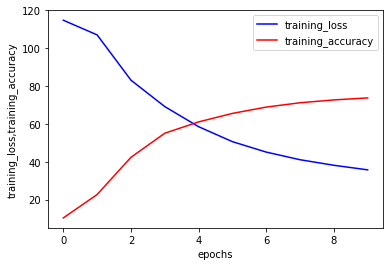

In [9]:
for i in range(accuracy_training.size):
    accuracy_training[i] = accuracy_training[i]*100
plt.plot(epoch_list,loss_training,label="training_loss",color='b')
plt.plot(epoch_list,accuracy_training,label="training_accuracy",color='r')
plt.xlabel('epochs')
plt.ylabel('training_loss,training_accuracy')
plt.legend()
plt.show()

In [10]:
accuracy_test = []
for i in range(int(X_test.shape[0]/batch_size)):
    random_test_list = np.random.randint(0,X_test.shape[0],batch_size)
    X = X_test[random_test_list]
    y = y_test[random_test_list]
    acc= forward_propagation_test(w1,w2,b1,b2,X,y,batch_size)
    accuracy_test.append(acc)
accuracy_test = np.array(accuracy_test)
print(np.sum(accuracy_test)/accuracy_test.size)



74.19
